In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

https://github.com/SusanXueyingShi/XueyingShi/blob/master/Shi_Xueying_Midterm_Logistic.ipynb

In [124]:
churn = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [102]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [125]:
#Contract = pd.get_dummies(churn['Contract'],drop_first=True)
churn = pd.get_dummies(churn, columns=['Contract'])
#churn = pd.concat([churn,Contract],axis=1)

In [104]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 23 columns):
customerID                 7043 non-null object
gender                     7043 non-null object
SeniorCitizen              7043 non-null int64
Partner                    7043 non-null object
Dependents                 7043 non-null object
tenure                     7043 non-null int64
PhoneService               7043 non-null object
MultipleLines              7043 non-null object
InternetService            7043 non-null object
OnlineSecurity             7043 non-null object
OnlineBackup               7043 non-null object
DeviceProtection           7043 non-null object
TechSupport                7043 non-null object
StreamingTV                7043 non-null object
StreamingMovies            7043 non-null object
PaperlessBilling           7043 non-null object
PaymentMethod              7043 non-null object
MonthlyCharges             7043 non-null float64
TotalCharges               704

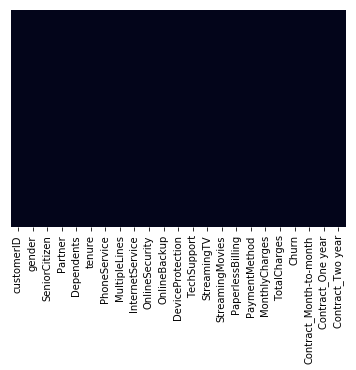

In [105]:
#Check if there is any missing data
sns.heatmap(churn.isnull(),yticklabels=False,cbar=False)

In [126]:
#to avoid issues with having too many dummy variables, I decided to re-categorize values for the columns below:

mlines = []
for i in churn['MultipleLines']:
    if i =='Yes':
        mlines.append('Yes')
    else:
        mlines.append('No')
churn['MultipleLines'] = mlines

iservice=[]
for i in churn['InternetService']:
    if i =='No':
        iservice.append('No')
    else:
        iservice.append('Yes')
churn['InternetService'] = iservice

osec=[]
for i in churn['OnlineSecurity']:
    if i =='Yes':
        osec.append('Yes')
    else:
        osec.append('No')
churn['OnlineSecurity'] = osec

obac=[]
for i in churn['OnlineBackup']:
    if i =='Yes':
        obac.append('Yes')
    else:
        obac.append('No')
churn['OnlineBackup'] = obac



dprot=[]
for i in churn['DeviceProtection']:
    if i =='Yes':
        dprot.append('Yes')
    else:
        dprot.append('No')
churn['DeviceProtection'] = dprot


tsup=[]
for i in churn['TechSupport']:
    if i =='Yes':
        tsup.append('Yes')
    else:
        tsup.append('No')
churn['TechSupport'] = tsup

strtv=[]
for i in churn['StreamingTV']:
    if i =='Yes':
        strtv.append('Yes')
    else:
        strtv.append('No')
churn['StreamingTV'] = strtv

strmov=[]
for i in churn['StreamingMovies']:
    if i =='Yes':
        strmov.append('Yes')
    else:
        strmov.append('No')
churn['StreamingMovies'] = strmov



In [127]:
gender = pd.get_dummies(churn['gender'],drop_first=True)
Churn = pd.get_dummies(churn['Churn'],drop_first=True)
Partner = pd.get_dummies(churn['Partner'],drop_first=True)
Dependents = pd.get_dummies(churn['Dependents'],drop_first=True)
PhoneService = pd.get_dummies(churn['PhoneService'],drop_first=True)
MultipleLines = pd.get_dummies(churn['MultipleLines'],drop_first=True)
InternetService = pd.get_dummies(churn['InternetService'],drop_first=True)
OnlineSecurity = pd.get_dummies(churn['OnlineSecurity'],drop_first=True)
OnlineBackup = pd.get_dummies(churn['OnlineBackup'],drop_first=True)
DeviceProtection = pd.get_dummies(churn['DeviceProtection'],drop_first=True)
TechSupport = pd.get_dummies(churn['TechSupport'],drop_first=True)
StreamingTV = pd.get_dummies(churn['StreamingTV'],drop_first=True)
StreamingMovies = pd.get_dummies(churn['StreamingMovies'],drop_first=True)
#Contract = pd.get_dummies(churn['Contract'],drop_first=True)


In [108]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 23 columns):
customerID                 7043 non-null object
gender                     7043 non-null object
SeniorCitizen              7043 non-null int64
Partner                    7043 non-null object
Dependents                 7043 non-null object
tenure                     7043 non-null int64
PhoneService               7043 non-null object
MultipleLines              7043 non-null object
InternetService            7043 non-null object
OnlineSecurity             7043 non-null object
OnlineBackup               7043 non-null object
DeviceProtection           7043 non-null object
TechSupport                7043 non-null object
StreamingTV                7043 non-null object
StreamingMovies            7043 non-null object
PaperlessBilling           7043 non-null object
PaymentMethod              7043 non-null object
MonthlyCharges             7043 non-null float64
TotalCharges               704

In [128]:
#besides dummies variables, paperlessbilling and paymentmethods are also dropped bc based on my experience, I don't think they will affect customers churn decision
#totalcharges needs to be dropped as well
churn.drop(['TotalCharges','customerID','gender','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','PaymentMethod','Churn'],axis=1,inplace=True)
churn = pd.concat([churn,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Churn],axis=1)
churn.columns=['SeniorCitizen','tenure','MonthlyCharges','Contract_Month-to-month','One year','Two year','gender','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Churn']

In [129]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 19 columns):
SeniorCitizen              7043 non-null int64
tenure                     7043 non-null int64
MonthlyCharges             7043 non-null float64
Contract_Month-to-month    7043 non-null uint8
One year                   7043 non-null uint8
Two year                   7043 non-null uint8
gender                     7043 non-null uint8
Partner                    7043 non-null uint8
Dependents                 7043 non-null uint8
PhoneService               7043 non-null uint8
MultipleLines              7043 non-null uint8
InternetService            7043 non-null uint8
OnlineSecurity             7043 non-null uint8
OnlineBackup               7043 non-null uint8
DeviceProtection           7043 non-null uint8
TechSupport                7043 non-null uint8
StreamingTV                7043 non-null uint8
StreamingMovies            7043 non-null uint8
Churn                      7043 non-null uint

In [111]:
churn.head()

,SeniorCitizen,tenure,MonthlyCharges,Contract_Month-to-month,One year,Two year,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Churn
0,0,1,29.85,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0
1,0,34,56.95,0,1,0,1,0,0,1,0,1,1,0,1,0,0,0,0
2,0,2,53.85,1,0,0,1,0,0,1,0,1,1,1,0,0,0,0,1
3,0,45,42.30,0,1,0,1,0,0,0,0,1,1,0,1,1,0,0,0
4,0,2,70.70,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1


In [130]:
from sklearn.model_selection import train_test_split

In [131]:
X_train, X_test, y_train, y_test = train_test_split(churn.drop('Churn',axis=1), 
                                                    churn['Churn'], test_size=0.50, 
                                                    random_state=101)

In [132]:
from sklearn.linear_model import LogisticRegression

In [133]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [134]:
predictions = logmodel.predict(X_test)

Evaluation

In [135]:
from sklearn.metrics import classification_report

In [136]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.83      0.91      0.87      2563
          1       0.67      0.51      0.58       959

avg / total       0.79      0.80      0.79      3522



In [137]:
churn.head()

,SeniorCitizen,tenure,MonthlyCharges,Contract_Month-to-month,One year,Two year,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Churn
0,0,1,29.85,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0
1,0,34,56.95,0,1,0,1,0,0,1,0,1,1,0,1,0,0,0,0
2,0,2,53.85,1,0,0,1,0,0,1,0,1,1,1,0,0,0,0,1
3,0,45,42.30,0,1,0,1,0,0,0,0,1,1,0,1,1,0,0,0
4,0,2,70.70,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1
